# Data Cleaning

## Importing libraries.

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from pandas.api.types import is_numeric_dtype
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import plot_tree


import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


from IPython.core import display as ICD
from math import ceil
from scipy import stats

data = pd.read_csv('jobs_in_data_2024.csv')
df = pd.DataFrame(data)

C:\Users\taman\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## We start by extracting the specific data we want where we drop those that occupies a small proportion of the data.

In [3]:
data =  {'experience_level':['Entry-level', 'Executive', 'Mid-level', 'Senior'], 'employment_type':['Contract', 'Freelance', 'Full-time', 'Part-time'], 'company_size':['L', 'M', 'S'], 'company_location':['Algeria','American Samoa','Andorra','Argentina','Armenia','Australia','Austria','Bahamas','Belgium','Bosnia and Herzegovina','Brazil','Canada','Central African Republic','China','Colombia','Croatia','Czechia','Denmark','Ecuador','Egypt','Estonia','Finland','France','Germany','Ghana','Gibraltar','Greece','Honduras','Hungary','India','Indonesia','Iran, Islamic Republic of','Iraq','Ireland','Israel','Italy','Japan','Kenya','Korea, Republic of','Latvia','Lebanon','Lithuania','Luxembourg','Malaysia','Malta','Mauritius','Mexico','Moldova, Republic of','Netherlands','New Zealand','Nigeria','Oman','Pakistan','Philippines','Poland','Portugal','Puerto Rico','Qatar','Romania','Russian Federation','Saudi Arabia','Singapore','Slovenia','South Africa','Spain','Sweden','Switzerland','T√ºrkiye','Thailand','Ukraine','United Arab Emirates','United Kingdom','United States','Viet Nam'],'job_category':['BI and Visualization','Cloud and Database','Data Analysis','Data Architecture and Modeling','Data Engineering','Data Management and Strategy','Data Quality and Operations','Data Science and Research','Leadership and Management','Machine Learning and AI'],'work_setting':['Hybrid','In-person','Remote']}

df = df[df['experience_level']!= 'Executive']
df = df[(df['employment_type'] != 'Contract') & (df['employment_type'] != 'Freelance') & (df['employment_type'] != 'Part-time')]
df = df[df['company_size'] != 'S']
df = df[df['company_location'] == 'United States']
df = df[(df['job_category'] != 'Cloud and Database') & (df['job_category'] != 'Data Management and Strategy') & (df['job_category']!= 'Data Quality and Operations') & (df['job_category'] != 'Data Architecture and Modeling')]
df = df[df['work_setting'] != 'Hybrid']

## Next, we drop the unnecessary columns that are not variables which we want to analyse.

In [4]:
df = df.drop(columns = ['salary', 'salary_currency','employee_residence','company_location','employment_type'])
print(df)

       work_year experience_level                 job_title  salary_in_usd  \
7           2024      Entry-level           Insight Analyst          50000   
8           2024      Entry-level           Insight Analyst          40000   
9           2024           Senior             Data Engineer         276000   
10          2024           Senior             Data Engineer         148000   
11          2024           Senior        Research Scientist         234000   
...          ...              ...                       ...            ...   
14186       2020        Mid-level            Data Scientist         118000   
14187       2020        Mid-level            Data Scientist         138350   
14188       2020        Mid-level             Data Engineer         130800   
14195       2020           Senior            Data Scientist         412000   
14196       2021        Mid-level  Principal Data Scientist         151000   

      work_setting company_size               job_category  
7 

## Next, we check for any null values in each variable so that we can remove them. 

In [5]:
print (df.isnull().sum())

work_year           0
experience_level    0
job_title           0
salary_in_usd       0
work_setting        0
company_size        0
job_category        0
dtype: int64


In [6]:
df.head()

,work_year,experience_level,job_title,salary_in_usd,work_setting,company_size,job_category
7,2024,Entry-level,Insight Analyst,50000,Remote,M,Data Analysis
8,2024,Entry-level,Insight Analyst,40000,Remote,M,Data Analysis
9,2024,Senior,Data Engineer,276000,In-person,M,Data Engineering
10,2024,Senior,Data Engineer,148000,In-person,M,Data Engineering
11,2024,Senior,Research Scientist,234000,In-person,M,Data Science and Research


## To check randomly whether the cleaning of datset was done properly

In [7]:
# Randomly select a specified number of rows from the DataFrame
random_subset = df.sample(n=20)  # Selecting 5 random rows, you can adjust the number as needed

# Print the random subset of data
print(random_subset)

       work_year experience_level                  job_title  salary_in_usd  \
13193       2022        Mid-level         Analytics Engineer         108000   
12757       2022           Senior              Data Engineer         200000   
1775        2024        Mid-level               Data Analyst          78000   
2053        2024           Senior             Data Scientist         160000   
9960        2023           Senior  Machine Learning Engineer         233000   
5638        2023           Senior         Research Scientist         225000   
7294        2023           Senior  Machine Learning Engineer         250500   
5815        2023      Entry-level              Data Engineer          85000   
5955        2023           Senior             Data Scientist         137500   
12093       2023      Entry-level              Data Engineer         160000   
13367       2022           Senior          Applied Scientist         212800   
715         2024           Senior               Data

## Next, we print out the different values for the quantiles, mean, etc.

In [8]:
df['salary_in_usd'].describe()

count     11430.000000
mean     156352.829396
std       60597.725778
min       20000.000000
25%      112200.000000
50%      148000.000000
75%      190000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

## Next, we define the quantiles so that we can drop any outliers.

In [9]:
salary = df['salary_in_usd']
Q1 = df['salary_in_usd'].quantile(0.20)
Q3 = df['salary_in_usd'].quantile(0.80)
IQR = Q3 - Q1
outliers_salary = df[(df['salary_in_usd'] < (Q1 - 1.5 * IQR)) | (df['salary_in_usd'] > (Q3 + 1.5 * IQR))]

df = df.drop(outliers_salary.index)
df.shape

(11349, 7)

In [10]:
df.head()

,work_year,experience_level,job_title,salary_in_usd,work_setting,company_size,job_category
7,2024,Entry-level,Insight Analyst,50000,Remote,M,Data Analysis
8,2024,Entry-level,Insight Analyst,40000,Remote,M,Data Analysis
9,2024,Senior,Data Engineer,276000,In-person,M,Data Engineering
10,2024,Senior,Data Engineer,148000,In-person,M,Data Engineering
11,2024,Senior,Research Scientist,234000,In-person,M,Data Science and Research


## Then we print the new quantiles, mean, median,etc.

In [11]:
df['salary_in_usd'].describe()

count     11349.000000
mean     154699.407877
std       57494.419409
min       20000.000000
25%      112000.000000
50%      147000.000000
75%      190000.000000
max      345400.000000
Name: salary_in_usd, dtype: float64

# Exploratory Data Analysis

## Pairwise Plots of All Variables against 'salary_in_usd'.

C:\Users\taman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\taman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\taman\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
C:\Users\taman\AppData\Local\Temp\ipykernel_1636\3302081654.py:3: UserWarning: The figure layout has changed to tight


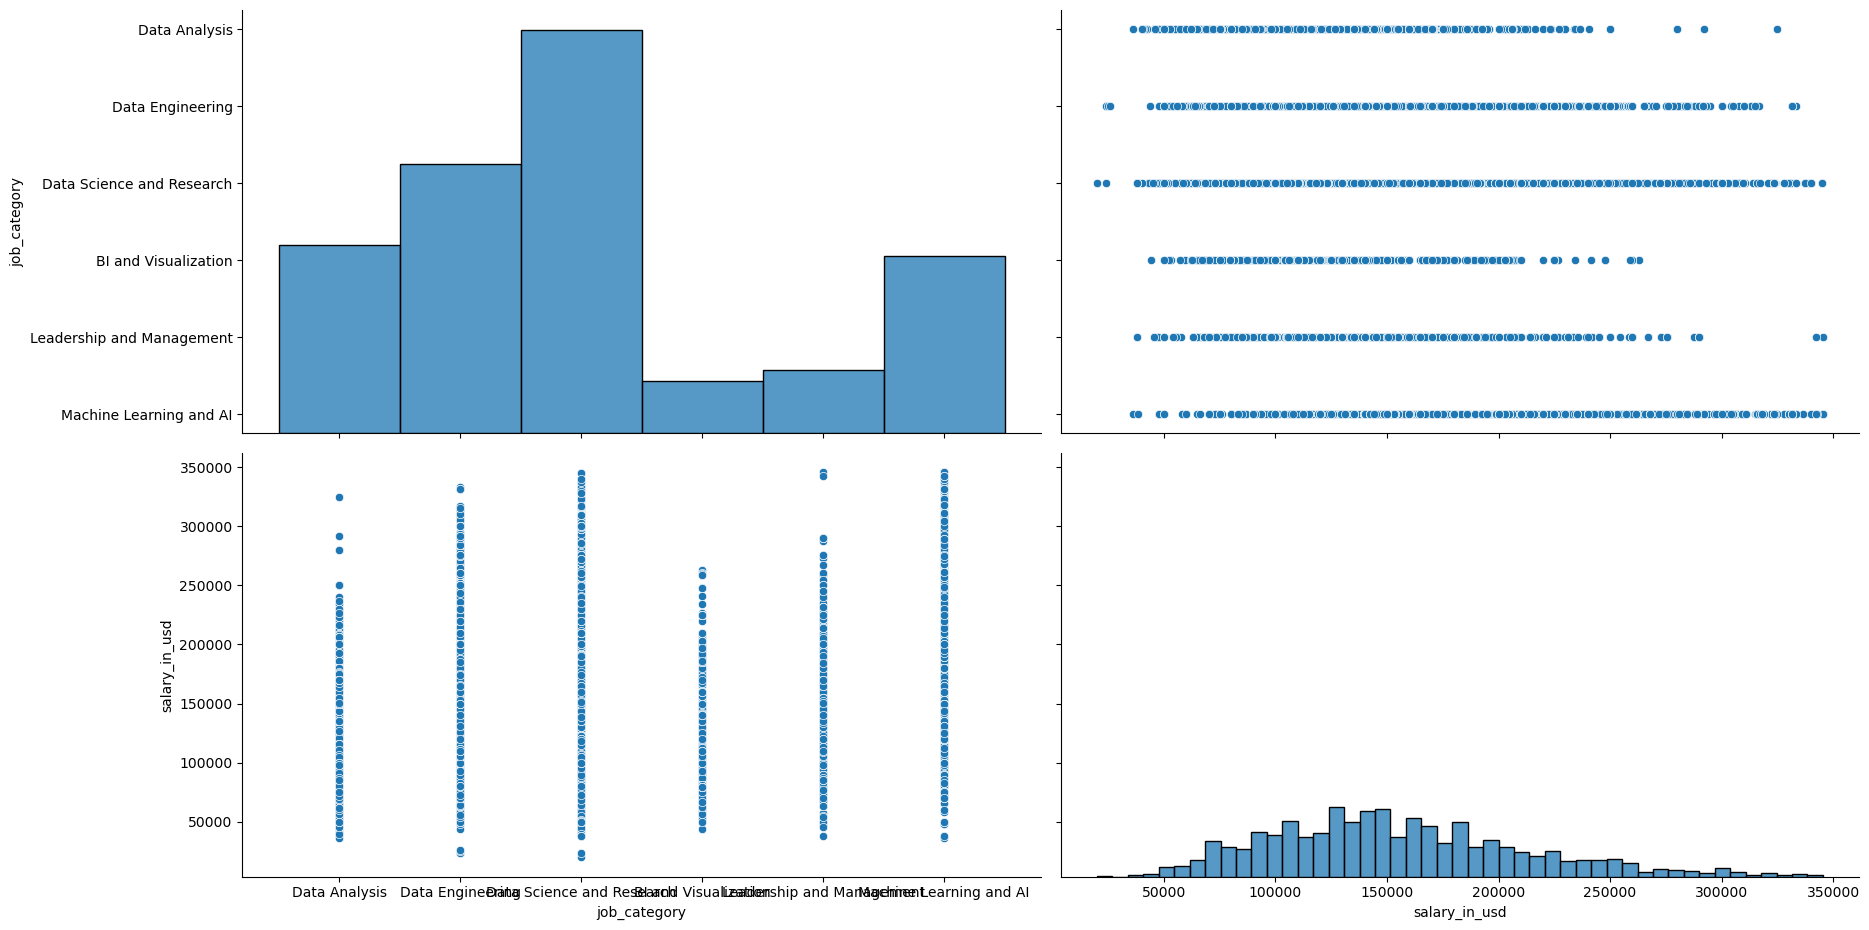

In [22]:
columns_to_add = ['job_category', 'salary_in_usd']
pairplot = sb.pairplot(data=df, vars=columns_to_add, height=4.7, aspect=2)
pairplot.fig.tight_layout()  # Adjust layout to fit elements

C:\Users\taman\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight


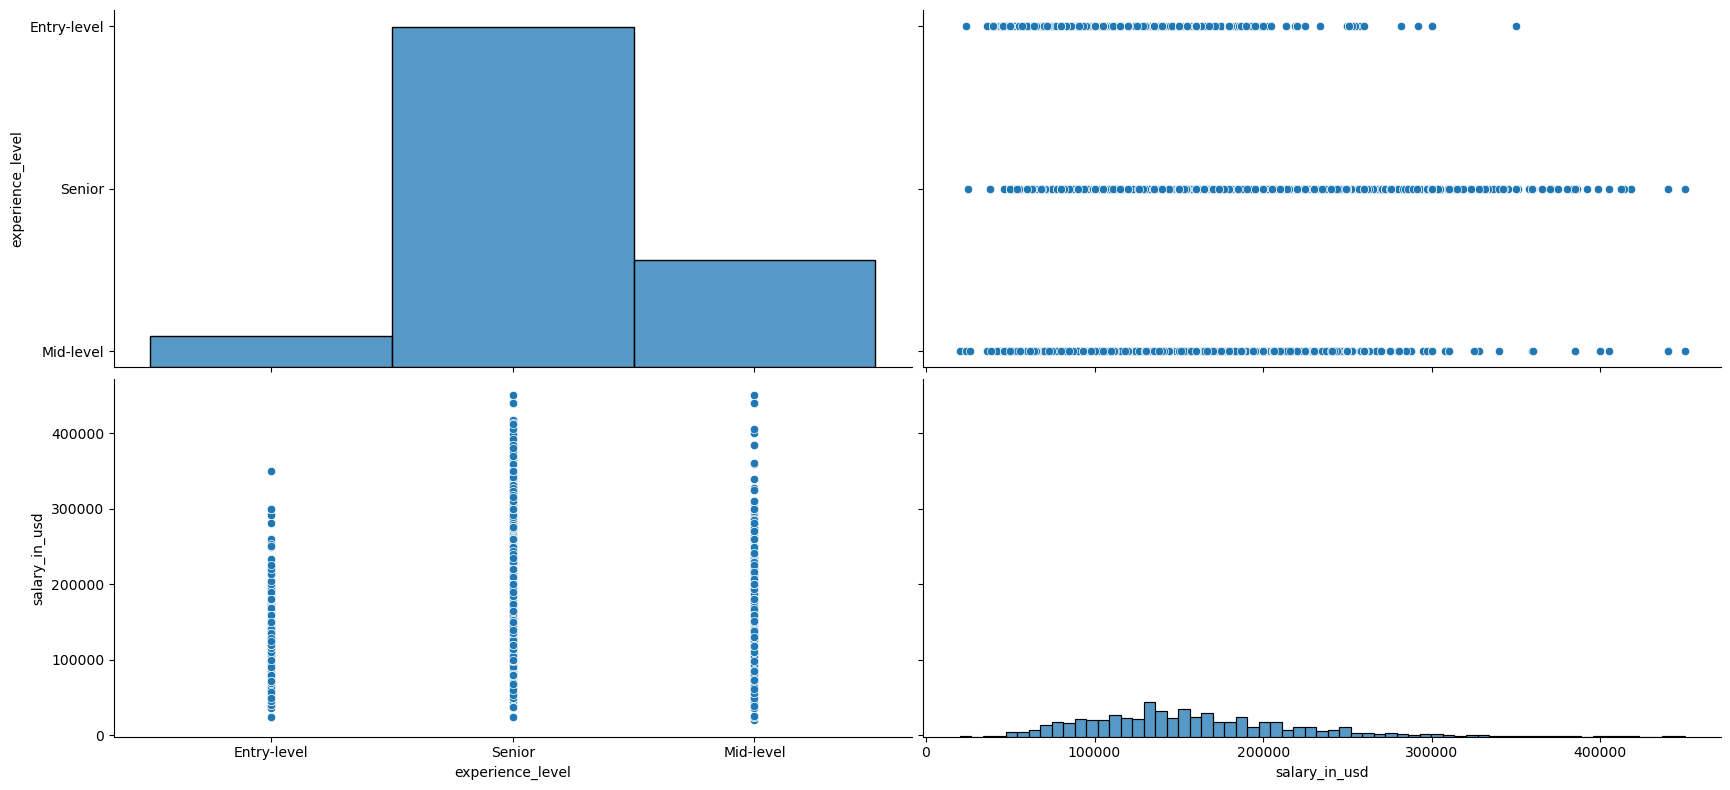

In [147]:
columns_to_add = ['experience_level', 'salary_in_usd']
sb.pairplot(data = df, vars = columns_to_add, height = 4, aspect = 2.2)

C:\Users\taman\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight


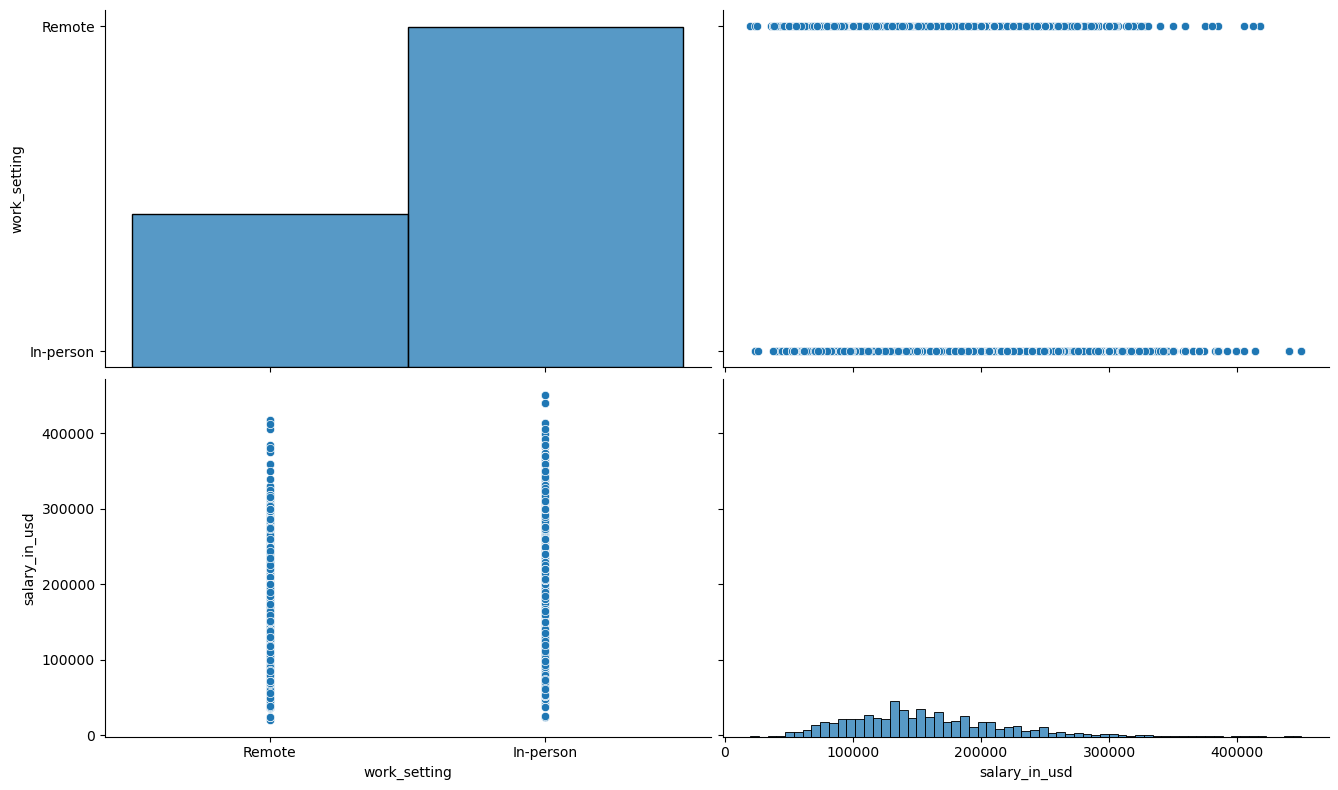

In [148]:
columns_to_add = ['work_setting', 'salary_in_usd']
sb.pairplot(data = df, vars = columns_to_add, height = 4, aspect = 1.7)

C:\Users\taman\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight


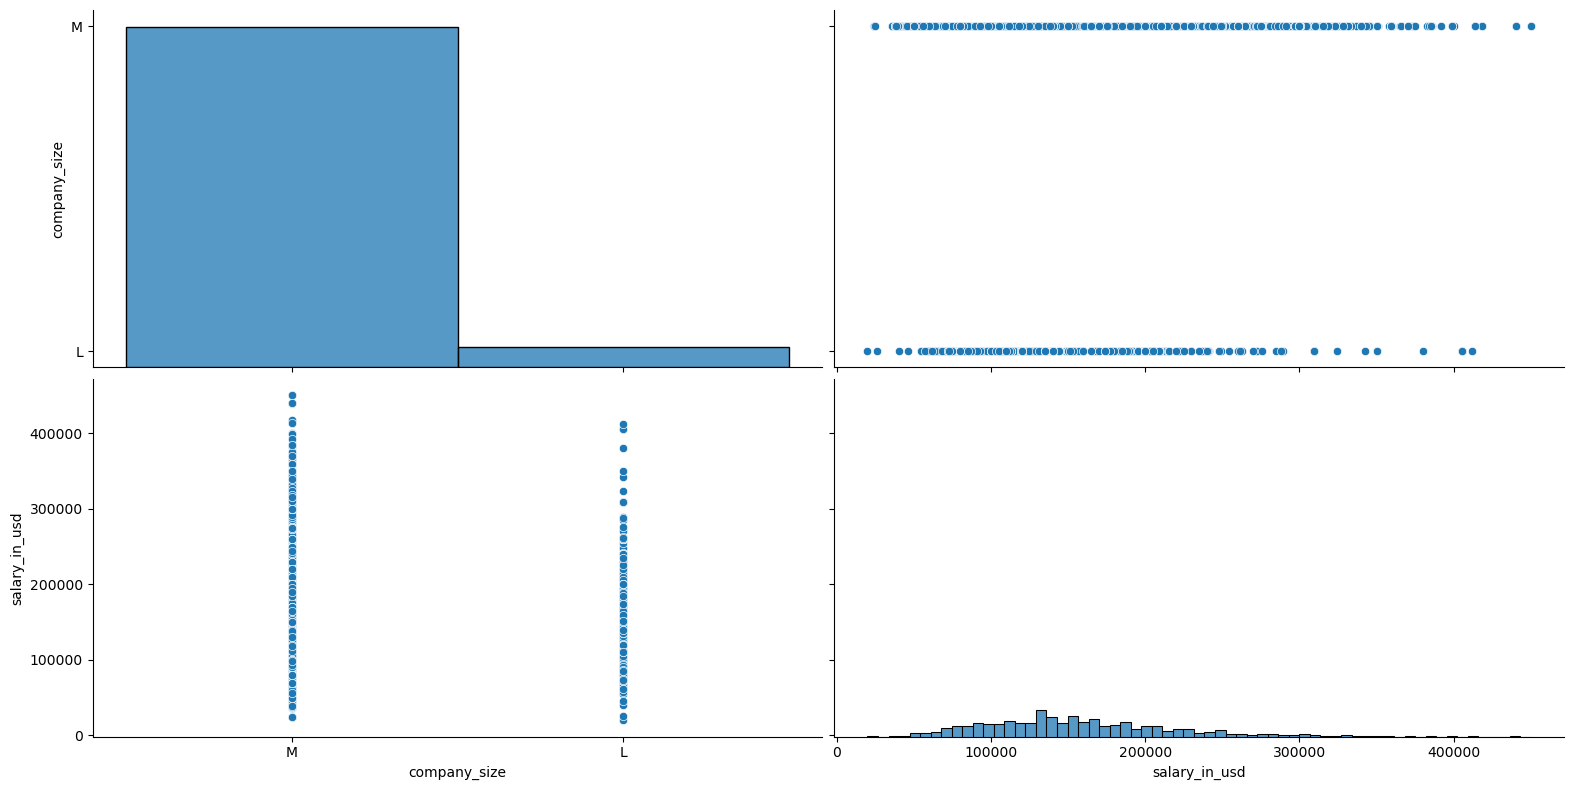

In [151]:
columns_to_add = ['company_size', 'salary_in_usd']
sb.pairplot(data = df, vars = columns_to_add, height = 4, aspect = 2)

## Next, we plot the boxplot for experience level against salary.

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

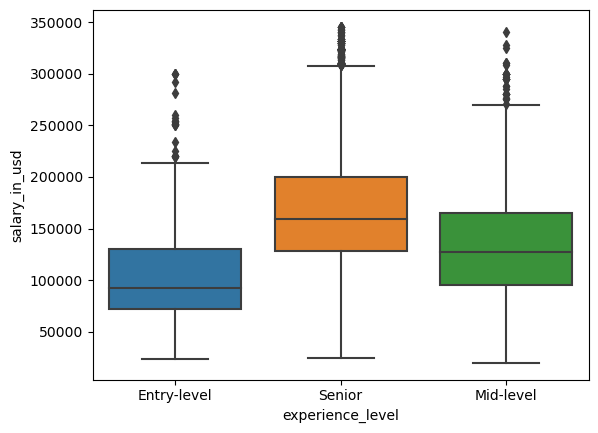

In [87]:
df = df[df['experience_level'].isin(['Entry-level','Mid-level','Senior'])] 
sb.boxplot(x='experience_level',y ='salary_in_usd', data = df)

### From the box plot above, it can be seen the experience level 'senior' has the highest median salary_in_usd, followed by mid-level and then the lowest being those in the 'entry-level', which is also logical since salary typically increases as your experience level increases. 50% of 'Senior' data has salary from around 130000 usd to 200000 usd whereas 50% of 'Entry-level' data has salary around 70000 usd to 130000 usd and 50% of 'Mid-Level' data has salary areound 100000 usd to 170000 usd. The range of data for 'Senior' is also the largest, followed by 'Mid-level' and lastly 'Entry-level'.

## Now, we plot the box plot of work_setting against salary.

<Axes: xlabel='work_setting', ylabel='salary_in_usd'>

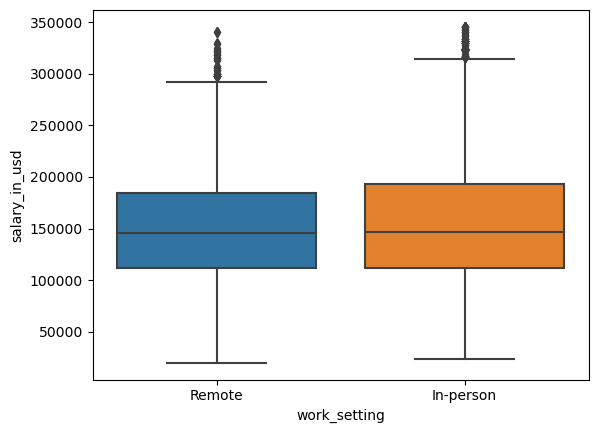

In [18]:
df = df[df['work_setting'].isin(['Remote','In-person'])] 
sb.boxplot(x='work_setting',y ='salary_in_usd', data = df)

### For work_setting, the median salary_in_usd is approximately the same with Q3 of in-person being slightly higher than remote work setting. The range of 'In-person' salary is also slightly higher than 'Remote' which could be due to having to travel to and fro the person's office and home. 

## Now, the box plot for company_size against salary. 

<Axes: xlabel='company_size', ylabel='salary_in_usd'>

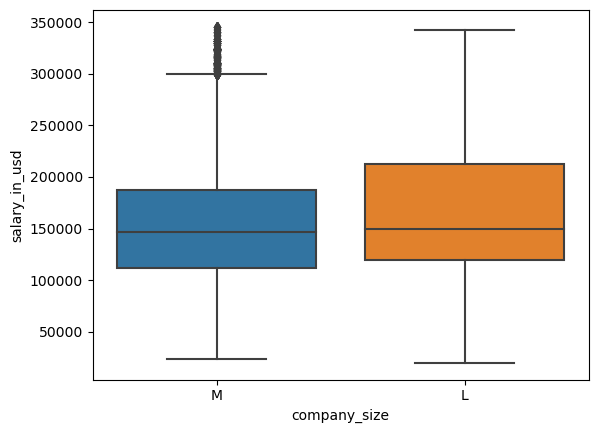

In [19]:
df = df[df['company_size'].isin(['M','L'])] 
sb.boxplot(x='company_size',y ='salary_in_usd', data = df)

### For company_size, the median salary_in_usd is also approximately the same but with Q3 of L(Large) companies being higher than M(Medium) companies. Additionally, the spread of salary for L companies is also more than that of M companies because L companies are more likely to have the financial resources to afford higher salaries for their employees and also, might have more higher-ranking positions than M companies. However, M companies have quite a lot of outliers whereas L companies has none. This might be because some minority of M companies might be doing better and can thus afford higher salaries for their employees, which is quite rare. One possible reason why L companies do not have outliers might be because across large companies, the salary payout is quite standard so there isn't particular circumstances where the salary will be very high or low.

## Now, the box plot for job_category against salary.

<Axes: xlabel='job_category', ylabel='salary_in_usd'>

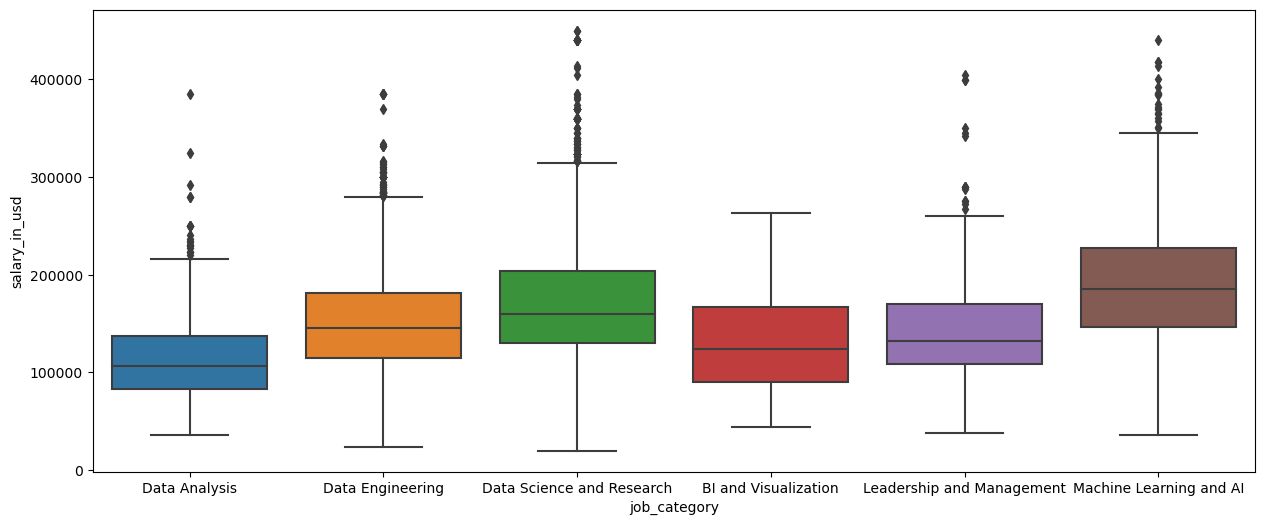

In [156]:
df = df[df['job_category'].isin(['BI and Visualization','Data Analysis', 'Data Engineering','Data Science and Research','Leadership and Management','Machine Learning and AI'])] 
plt.figure(figsize=(15, 6))
sb.boxplot(x='job_category',y ='salary_in_usd', data = df)

### Across the different job categories, Machine Learning and AI has the highest median salary whereas Data Analysis has the lowest median salary. This might be due to the rising attention on AI and integrating machines into our life, thus demanding more employees in that aspect and thus, higher salaries paid. The spread of salaries under Machine Learning and AI is also the highest, which means that those who might be in the 'Entry-Level' might be earning significantly less than those who are already inthe 'Senior' category. There are outliers for the Data Analysis, Data Engineering, Data Science and Research and Leadership and Management categories which could be because they are at extremely high positions in their jobs or it might be because their companies are doing extremely well.

## Now, the box plot for job_title against salary.

<Axes: xlabel='job_title', ylabel='salary_in_usd'>

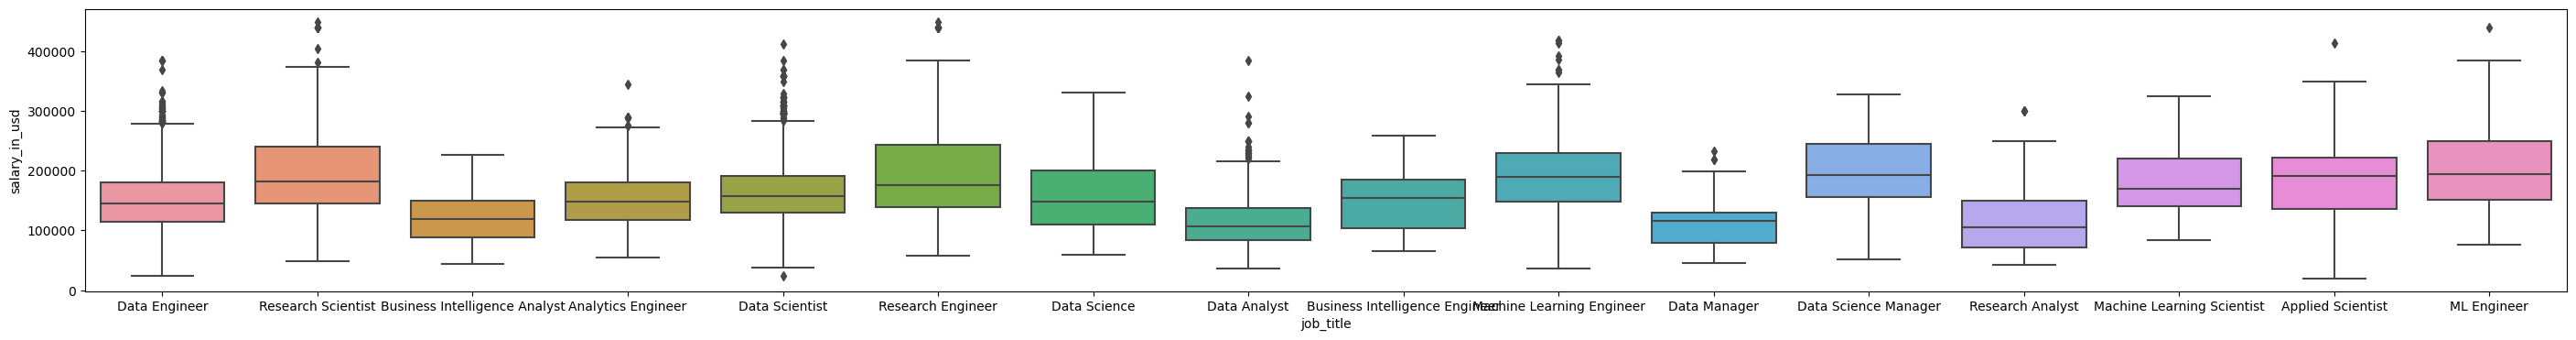

In [157]:
df = df[df['job_title'].isin(['Analytics Engineer','Applied Scientist','Business Intelligence Engineer','Business Intelligence Analyst','Data Analyst','Data Architect','Data Engineer','Data Manager','Data Science','Data Science Manager','Data Scientist','Machine Learning Engineer','Machine Learning Scientist','ML Engineer','Research Analyst','Research Engineer','Research Scientist',''])] 
plt.figure(figsize=(35, 4))
sb.boxplot(x='job_title',y ='salary_in_usd', data = df)

### The highest median salary is approximately shared between Research Scientist(Data Science and research), Machine Learning Engineer(Machine Learning and AI), Data Science Manager(Data Science and Research), Applied Scientist(Data Science and Research) and ML Engineer(Machine Learning and AI). Hence, we can infer that the job categories of Data Science and Research and Machine Learning has more higher-paying job titles than the other categories. This delves deeper into the salaries of specific job titles under the job categories so that if a person is looking for a high-paying specific job under either of these 2 job categories, Data Science and Research and Machine Learning and AI, he will know what to choose.¶

## Now, we will make 'salary_in_usd' into a categorical data with 4 levels.

In [23]:
### Defining variables
low = df['salary_in_usd'].quantile(0.20) ##Q1
medium_low = df['salary_in_usd'].quantile(0.50)
medium_high = df['salary_in_usd'].quantile(0.80)

### Setting categories
def get_salary_category(salary_in_usd):
    if salary_in_usd <= low:
        return 'Low'
    if low < salary_in_usd <= medium_low:
        return 'Medium Low'
    if medium_low < salary_in_usd <= medium_high:
        return 'Medium High'
    if salary_in_usd > medium_high:
        return 'High'

df['salary_category'] = df['salary_in_usd'].apply(get_salary_category)
df.head()

,work_year,experience_level,job_title,salary_in_usd,work_setting,company_size,job_category,salary_category
7,2024,Entry-level,Insight Analyst,50000,Remote,M,Data Analysis,Low
8,2024,Entry-level,Insight Analyst,40000,Remote,M,Data Analysis,Low
9,2024,Senior,Data Engineer,276000,In-person,M,Data Engineering,High
10,2024,Senior,Data Engineer,148000,In-person,M,Data Engineering,Medium High
11,2024,Senior,Research Scientist,234000,In-person,M,Data Science and Research,High


## We plot a catplot to check the count of people under each category of salary.

C:\Users\taman\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight


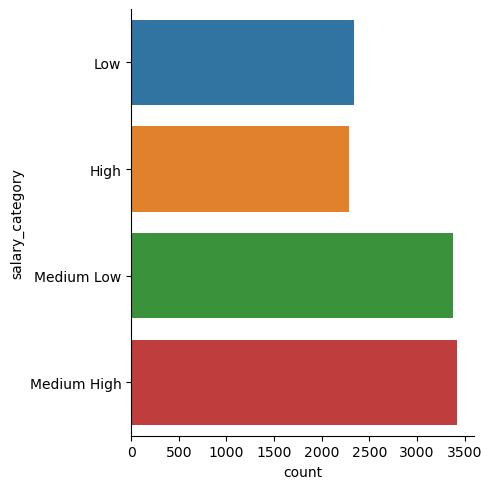

In [154]:
sb.catplot(y= 'salary_category', data = df, kind = "count")

In [155]:
percentage_split = (df['salary_category'].value_counts() / len(df['salary_category'])) * 100
print (percentage_split)

salary_category
Medium High    29.965004
Medium Low     29.580052
Low            20.481190
High           19.973753
Name: count, dtype: float64


### From the plot above, it can be seen that there are roughly 10% more people with medium high and medium low salaries as compared to high and low salaries, which is logical since the general population should be earning around medium salary unless he is very high in rank in his job.

## Now, we will convert the categorical data into numerical data that can be used for analysis. 

In [24]:
df_duplicate = df.copy()

In [27]:
df_duplicate['experience_level'] = df_duplicate['experience_level'].replace(['Entry-level', 'Mid-level', 'Senior'], [0, 1, 2])
df_duplicate['work_setting'] = df_duplicate['work_setting'].replace(['Remote', 'In-person'], [0, 1])
df_duplicate['company_size'] = df_duplicate['company_size'].replace(['M', 'L'], [0, 1])
df_duplicate['job_category'] = df_duplicate['job_category'].replace(['Data Analysis', 'Data Engineering', 'Data Science and Research', 'BI and Visualization', 'Leadership and Management', 'Machine Learning and AI'], [0, 1, 2, 3, 4, 5])
df_duplicate['salary_category'] = df_duplicate['salary_category'].replace(['Low', 'Medium Low', 'Medium High', 'High'], [0, 1, 2, 3])

In [28]:
new_df = df_duplicate[['experience_level', 'work_setting', 'company_size', 'job_category', 'salary_category']].copy()
new_df

,experience_level,work_setting,company_size,job_category,salary_category
7,0,0,0,0,0
8,0,0,0,0,0
9,2,1,0,1,3
10,2,1,0,1,2
11,2,1,0,2,3
...,...,...,...,...,...
14185,2,0,0,2,2
14186,1,0,0,2,1
14187,1,0,0,2,1
14188,1,0,0,1,1


## Performing Cramer's V Test to find correlation between each categorical variable with salary.

In [29]:
### Cramer's V
from scipy.stats import chi2_contingency
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Loop through each categorical variable
for column in new_df.columns[:-1]:  # Exclude the target variable 'salary_category'
    confusion_matrix = pd.crosstab(new_df['salary_category'], new_df[column])
    if confusion_matrix.values.size == 0:
        print(f"No data for '{column}'. Skipping calculation of Cramér's V.")
    else:
        v = cramers_v(confusion_matrix)
        print(f"Cramér's V between 'salary_category' and '{column}': {v}")

Cramér's V between 'salary_category' and 'experience_level': 0.2536934876376228
Cramér's V between 'salary_category' and 'work_setting': 0.08818612504174299
Cramér's V between 'salary_category' and 'company_size': 0.07920845313704636
Cramér's V between 'salary_category' and 'job_category': 0.2468278606178054


## Finding top variable based on Chi-square scores to determine its importance in determining result of the target variable 'salary_category'.

In [30]:
#We use Chi2score>100 and k=38

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

k = min(38, new_df.shape[1] - 1)
category_rank_feature = SelectKBest(score_func=chi2, k=k)
features = new_df.drop(columns=['salary_category'])
target = new_df['salary_category']
rank_feature = category_rank_feature.fit(features, target)
print(rank_feature.scores_)

[ 313.58331617   28.46326774   70.02626807 1234.91019436]


## Finding the ranking of variables in ascending order. 

In [31]:
cat_score = pd.DataFrame(rank_feature.scores_, columns=['Score'])
cat_col = pd.DataFrame(new_df.columns, columns=['Feature'])
univariate_cat_rank = pd.concat([cat_col, cat_score], axis=1)
univariate_cat_rank.set_index('Feature', inplace=True)
sorted_univariate_cat_rank = univariate_cat_rank.sort_values('Score', ascending=False)
sorted_univariate_cat_rank

,Score
Feature,
job_category,1234.910194
experience_level,313.583316
company_size,70.026268
work_setting,28.463268
salary_category,NaN


## Splitting dataset into train and test data.

In [32]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = new_df.drop(columns=['salary_category'])  # Features
y = new_df['salary_category']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (9079, 4)
Shape of X_test: (2270, 4)
Shape of y_train: (9079,)
Shape of y_test: (2270,)


# Machine Learning

## Defining performance metrics.

In [33]:
from sklearn.metrics import confusion_matrix, f1_score

def evaluate_model_performance(y_true, y_pred):
    """
    Compute the F1 score (micro) using the confusion matrix to evaluate the model performance.
    
    Parameters:
    - y_true: true labels
    - y_pred: predicted labels
    
    Returns:
    - f1_micro: F1 score (micro)
    """
    
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Compute F1 score (micro)
    f1_micro = f1_score(y_true, y_pred, average='micro')
    
    print("Confusion Matrix:")
    print(cm)
    print("\nF1 Score (Micro): {:.4f}".format(f1_micro))
    
    return f1_micro

## Defining function for confusion matrix

In [34]:
def make_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sb.heatmap(cm, annot=True, fmt='d', cmap='plasma', 
                xticklabels=['Low', 'Medium Low', 'Medium High', 'High'],
                yticklabels=['Low', 'Medium Low', 'Medium High', 'High'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix for {}'.format(title))
    plt.show()

## Model 1: Decision Tree

In [35]:
from sklearn.model_selection import KFold, cross_val_score

model_tree = DecisionTreeClassifier(random_state=0)
model_tree.fit(X_train, y_train)

kfold = KFold(n_splits=10, random_state = 0, shuffle=True)
scores_tree = cross_val_score(model_tree, X_train, y_train, scoring="f1_micro", cv=kfold)
result_tree = scores_tree.mean()
print('Average F1 Score (Micro) for Decision Tree is : {}'.format(result_tree))

Average F1 Score (Micro) for Decision Tree is : 0.41039795715166905


In [36]:
#Fit the Model
from sklearn.metrics import classification_report
    
prediction = model_tree.predict(X_test)
train_prediction = model_tree.predict(X_train)

print(classification_report(y_test, prediction))
train_score = f1_score(y_train, train_prediction, average='micro')
score_dt = f1_score(y_test, prediction, average='micro')
print('Train F1 Score (Micro) for Decision Tree Algorithm is : {}'.format(train_score))
print('Test F1 Score (Micro) for Decision Tree Algorithm is : {}'.format(score_dt))

              precision    recall  f1-score   support

           0       0.51      0.38      0.43       447
           1       0.39      0.44      0.41       670
           2       0.38      0.52      0.44       688
           3       0.47      0.24      0.32       465

    accuracy                           0.41      2270
   macro avg       0.44      0.39      0.40      2270
weighted avg       0.43      0.41      0.40      2270

Train F1 Score (Micro) for Decision Tree Algorithm is : 0.42207291551933035
Test F1 Score (Micro) for Decision Tree Algorithm is : 0.4105726872246696


In [37]:
train_f1_tree = evaluate_model_performance(y_train, train_prediction)

Confusion Matrix:
[[ 736  697  432   29]
 [ 281 1228  973  185]
 [ 209  768 1476  264]
 [  42  444  923  392]]

F1 Score (Micro): 0.4221


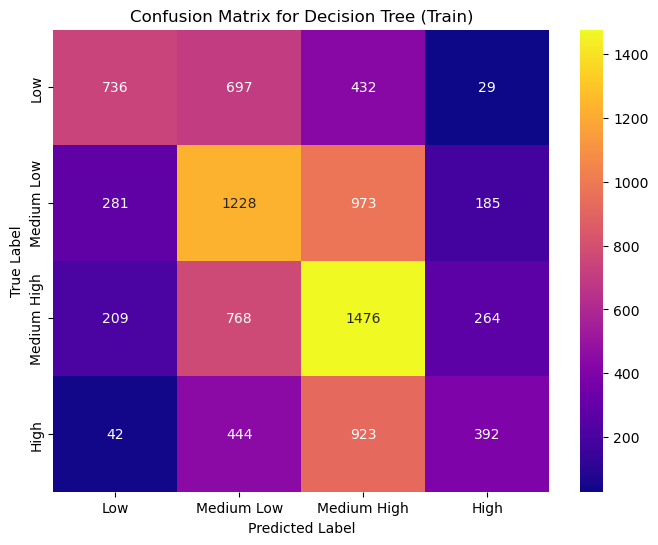

In [38]:
make_confusion_matrix(y_train, train_prediction, 'Decision Tree (Train)')

In [39]:
test_f1_tree = evaluate_model_performance(y_test, prediction)

Confusion Matrix:
[[170 164 103  10]
 [ 97 293 231  49]
 [ 55 207 358  68]
 [ 13  94 247 111]]

F1 Score (Micro): 0.4106


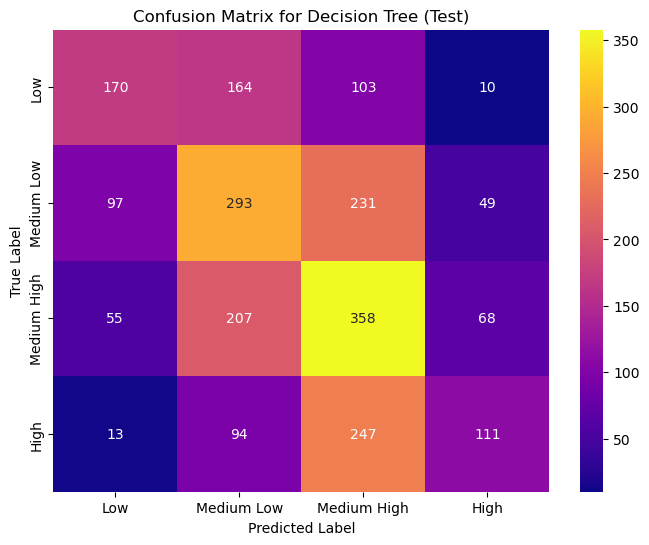

In [40]:
make_confusion_matrix(y_test, prediction, 'Decision Tree (Test)')

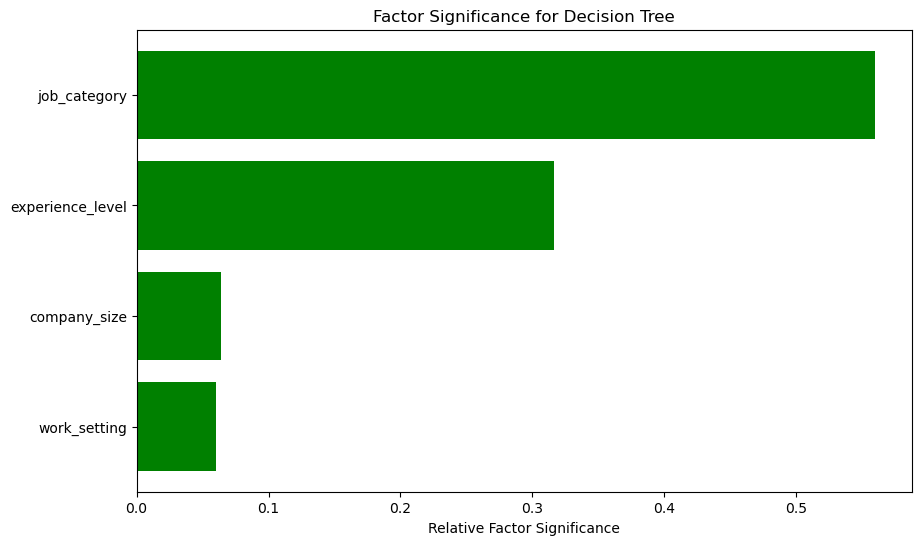

In [41]:
factors = X.columns
importances = model_tree.feature_importances_
indices = np.argsort(importances)[::1]
plt.figure(figsize=(10,6))
plt.title('Feature Importances')
plt.barh(range(len(indices[-10:])), importances[indices], color='g', align='center')
plt.yticks(range(len(indices[-10:])), factors[indices])
plt.xlabel('Relative Factor Significance')
plt.title('Factor Significance for Decision Tree')
plt.show()

## Model 2: Extreme Gradient Boosting (XGB)

In [42]:
from sklearn.preprocessing import OrdinalEncoder
from xgboost import XGBClassifier

# Encode categorical columns
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Train XGBoost model
model_xgb = XGBClassifier(objective='multi:softmax', num_class=4, random_state=42)
model_xgb.fit(X_train_encoded, y_train)

# Find F1 Score
kfold = KFold(n_splits=10, random_state = 0, shuffle=True)
scores_xgb = cross_val_score(model_xgb, X_train_encoded, y_train, scoring="f1_micro", cv=kfold)
result_xgb = scores_xgb.mean()
print('Average F1 Score (Micro) for Decision Tree is : {}'.format(result_xgb))

Average F1 Score (Micro) for Decision Tree is : 0.4108384857860304


In [43]:
# Predict on train and test data
train_pred_xgb = model_xgb.predict(X_train_encoded)
pred_xgb = model_xgb.predict(X_test_encoded)

# Print classification report
print("Classification Report for Extreme Gradient Boosting:")
print(classification_report(y_test, pred_xgb))

# Compute and print F1 scores
train_score_xgb = f1_score(y_train, train_pred_xgb, average='micro')
score_xgb = f1_score(y_test, pred_xgb, average='micro')

print('Train F1 Score (Micro) for Extreme Gradient Boosting Algorithm is : {:.4f}'.format(train_score_xgb))
print('Test F1 Score (Micro) for Extreme Gradient Boosting Algorithm is : {:.4f}'.format(score_xgb))

Classification Report for Extreme Gradient Boosting:
              precision    recall  f1-score   support

           0       0.52      0.38      0.44       447
           1       0.39      0.44      0.41       670
           2       0.38      0.52      0.44       688
           3       0.46      0.24      0.31       465

    accuracy                           0.41      2270
   macro avg       0.44      0.39      0.40      2270
weighted avg       0.43      0.41      0.41      2270

Train F1 Score (Micro) for Extreme Gradient Boosting Algorithm is : 0.4221
Test F1 Score (Micro) for Extreme Gradient Boosting Algorithm is : 0.4115


In [44]:
train_f1_xgb = evaluate_model_performance(y_train, train_pred_xgb)

Confusion Matrix:
[[ 733  697  433   31]
 [ 279 1227  973  188]
 [ 207  768 1477  265]
 [  42  441  923  395]]

F1 Score (Micro): 0.4221


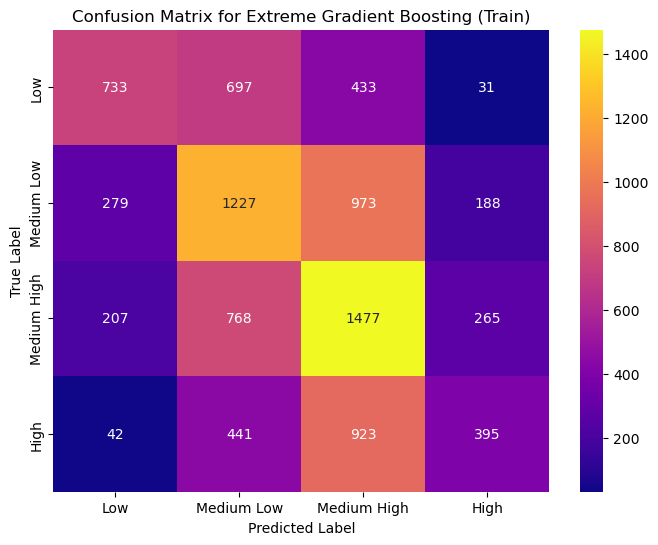

In [45]:
make_confusion_matrix(y_train, train_pred_xgb, 'Extreme Gradient Boosting (Train)')

In [46]:
test_f1_xgb = evaluate_model_performance(y_test, pred_xgb)

Confusion Matrix:
[[169 163 103  12]
 [ 92 296 232  50]
 [ 54 208 358  68]
 [ 13  94 247 111]]

F1 Score (Micro): 0.4115


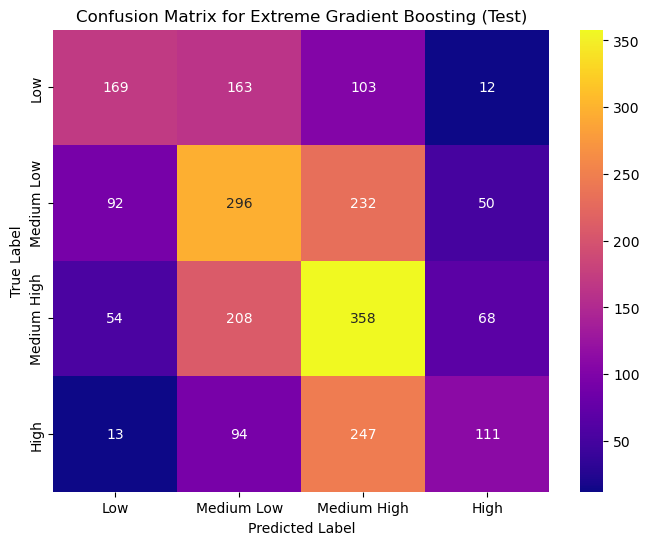

In [47]:
make_confusion_matrix(y_test, pred_xgb, 'Extreme Gradient Boosting (Test)')

<Figure size 1200x800 with 0 Axes>

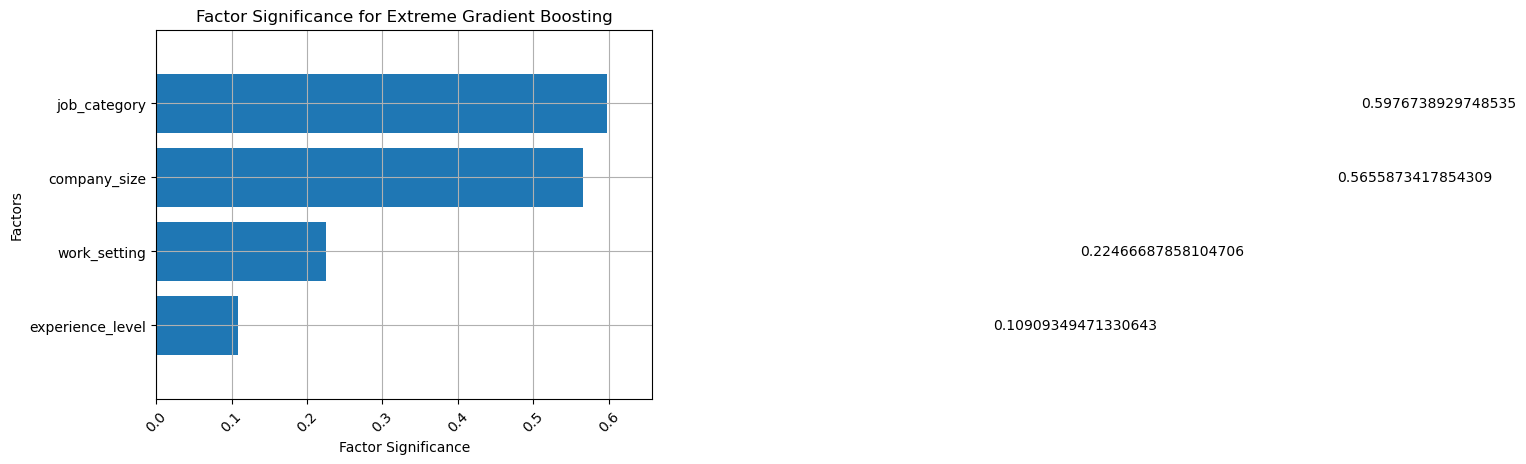

In [48]:
# Plot factor significance
import xgboost as xgb

plt.figure(figsize=(12, 8))
xgb.plot_importance(model_xgb, importance_type='gain', max_num_features=10, height=0.8, xlabel='Factor Significance', ylabel='Factors', title='Factor Significance for Extreme Gradient Boosting')
plt.xticks(rotation=45)
plt.yticks(range(len(factors)), factors)
plt.show()

## Model 3: Random Forest

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix


# Model Creation and Training
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

kfold = KFold(n_splits=10, random_state = 0, shuffle=True)
scores_rf = cross_val_score(model_rf, X_train, y_train, scoring="f1_micro", cv=kfold)
result_rf = scores_rf.mean()
print('Average F1 Score (Micro) for Decision Tree is : {}'.format(result_rf))

Average F1 Score (Micro) for Decision Tree is : 0.4106182214688497


In [56]:
#Prediction
y_pred = model_rf.predict(X_test)
train_prediction_rf = model_rf.predict(X_train)

print(classification_report(y_test, y_pred))
train_score_rf = f1_score(y_train, train_prediction_rf, average='micro')
score_rf = f1_score(y_test, y_pred, average='micro')
print('Train F1 Score (Micro) for Decision Tree Algorithm is : {}'.format(train_score_rf))
print('Test F1 Score (Micro) for Decision Tree Algorithm is : {}'.format(score_rf))

              precision    recall  f1-score   support

           0       0.51      0.38      0.44       447
           1       0.39      0.44      0.41       670
           2       0.38      0.52      0.44       688
           3       0.46      0.24      0.31       465

    accuracy                           0.41      2270
   macro avg       0.43      0.39      0.40      2270
weighted avg       0.42      0.41      0.40      2270

Train F1 Score (Micro) for Decision Tree Algorithm is : 0.42207291551933035
Test F1 Score (Micro) for Decision Tree Algorithm is : 0.41013215859030844


In [57]:
train_f1_rf = evaluate_model_performance(y_train, train_prediction_rf)

Confusion Matrix:
[[ 736  695  432   31]
 [ 281 1225  973  188]
 [ 209  767 1475  266]
 [  42  441  922  396]]

F1 Score (Micro): 0.4221


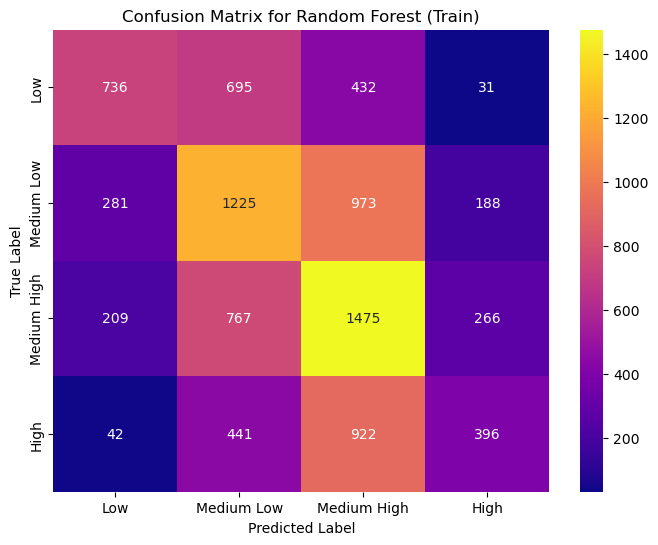

In [58]:
make_confusion_matrix(y_train, train_prediction_rf, 'Random Forest (Train)')

In [59]:
test_f1_rf = evaluate_model_performance(y_test, y_pred)

Confusion Matrix:
[[170 162 103  12]
 [ 94 292 234  50]
 [ 55 207 358  68]
 [ 13  94 247 111]]

F1 Score (Micro): 0.4101


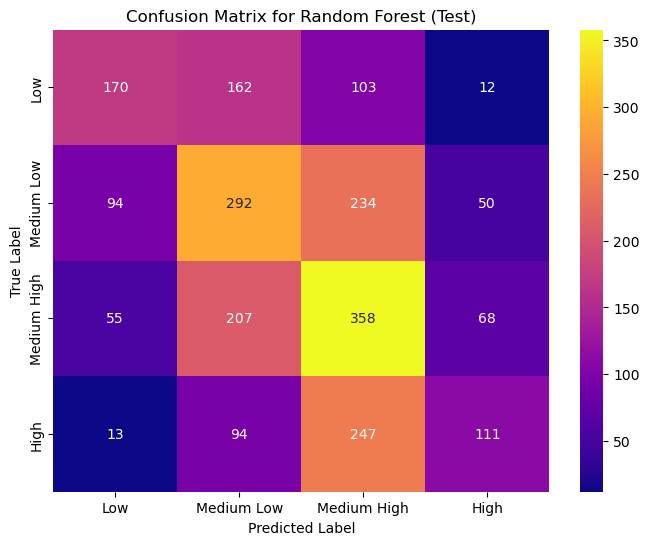

In [60]:
make_confusion_matrix(y_test, y_pred, 'Random Forest (Test)')

Feature Importance:
            Feature  Importance
3      job_category    0.537643
0  experience_level    0.340087
1      work_setting    0.064625
2      company_size    0.057645


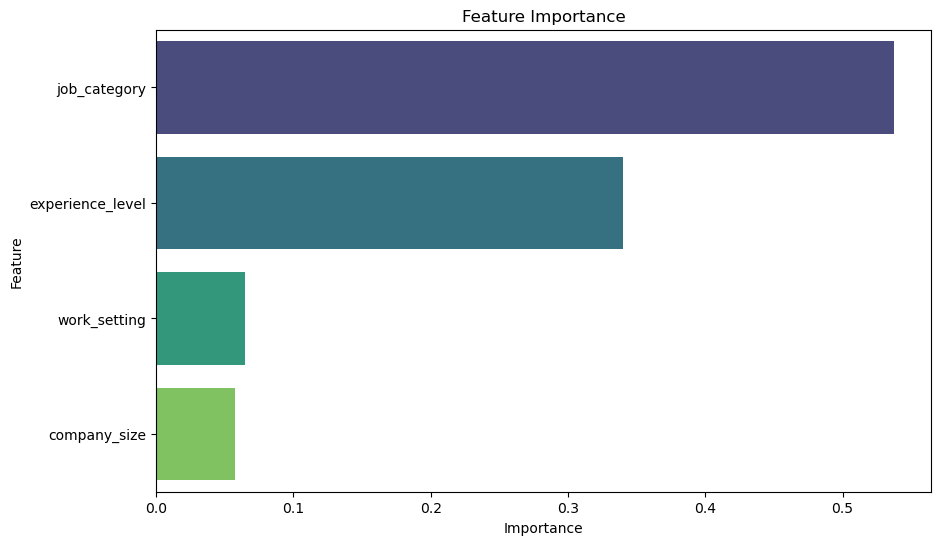

In [61]:
# Feature Importance
importance = model_rf.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

#Sort the importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(feature_importance)

# Plotting
plt.figure(figsize=(10, 6))
sb.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()